# The Bias-Variance-Tradeoff

> **Author:** Bjarne C. Hiller

$$
    \mathbb{E}_{D, \epsilon} \left[ \left(y - \hat{f}(x; D) \right)^2 \right] = \left( \mathrm{Bias}_D[\hat{f} (x; D)] \right)^2 + \mathrm{Var}_D [ \hat{f} (x; D)] + \sigma^2
$$

- https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Bias%E2%80%93variance_decomposition_of_mean_squared_error


In [90]:
import numpy as np

np.random.seed(19)

def sample(n=100):
    return np.random.uniform(low=-2*np.pi, high=2*np.pi, size=(n,1))

def f(x):
    return 1 + np.cos(x)

sigma = 0.01

def noise(n=100):
    return np.random.normal(loc=0, scale=sigma, size=(n,1))

In [91]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

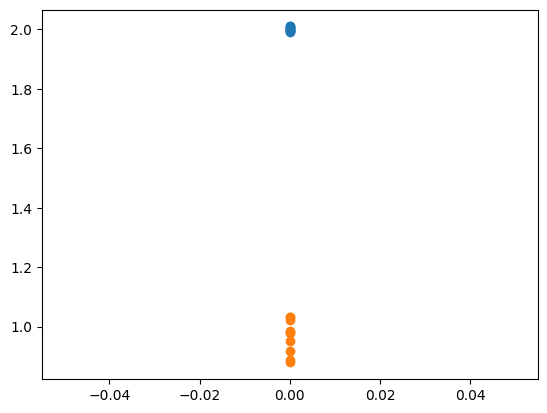

In [92]:
def decomposition(model, x0=0, n=100, runs=10):
    y_true = []
    y_hat = []

    for i in range(runs):
        x = sample(n)
        fx = f(x)
        epsilon = np.random.normal(0, sigma)
        y = f(x) + epsilon
        model.fit(x, y)
        y_hat.append(model.predict(np.array([[x0]])))
        y_true.append(f(x0) + epsilon)
    return y_true, y_hat

model = make_pipeline(PolynomialFeatures(1), LinearRegression())
y_true, y_hat = decomposition(model)
plt.scatter(np.zeros_like(y_true), y_true)
plt.scatter(np.zeros_like(y_hat), y_hat)


In [93]:
epsilon.shape

(100, 1)

In [99]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression

n_train = 100
n_test = 100

repeats = 10
sigma = 0.01

max_degree = 10
degrees = np.arange(1, max_degree+1)
bias = np.zeros((max_degree, repeats))
vars = np.zeros((max_degree, repeats))

x_test = np.linspace(-2*np.pi, 2*np.pi, n_test).reshape(n_test, 1)

predictions = np.zeros((max_degree, repeats, n_test))

for i, d in enumerate(degrees):
    for r in range(repeats):
        x_train = sample(n_train)
        epsilon = noise(n_train)

        y_train = f(x_train) + epsilon
        #y_train = y_train[:, 0]

        model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
        model.fit(x_train, y_train)

        y_hat = model.predict(x_train)

        predictions[i,r] = y_hat[:,0]

y_test = f(x_test)[:, 0]
bias = np.mean(predictions - y_test, axis=1).mean(axis=1)
variance = np.var(predictions, axis=1).mean(axis=1)

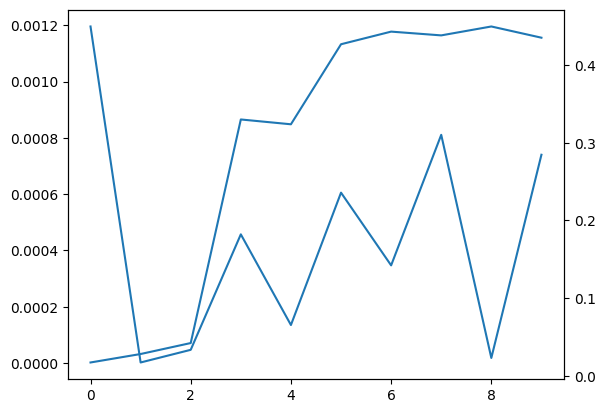

In [101]:
plt.plot(np.power(bias, 2))
plt.twinx()
plt.plot(variance)

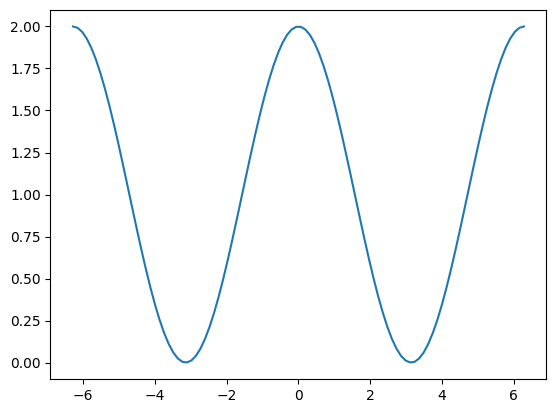

In [97]:
plt.plot(x_test, y_test)